# Properties of summer-months flights

In [2]:
dataset_meta = DatasetMeta(SchemaName.FLIGHTS, FlightsDatasetName.DATASET2)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
65,65,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
71,71,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1
104,104,B6,BOS,BWI,727,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
108,108,DL,BOS,DTW,2079,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
121,121,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1


In [3]:
actions_lst = [
    GroupAction(grouped_column=Column('month'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    FilterAction(filtered_column=Column('departure_delay'), filter_operator=FilterOperator.NOTEQUAL,
         filter_term='ON_TIME'),
    GroupAction(grouped_column=Column('month'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
    GroupAction(grouped_column=Column('departure_delay'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    BackAction(),
    FilterAction(filtered_column=Column('month'), filter_operator=FilterOperator.GREATER,
             filter_term='7'),
    FilterAction(filtered_column=Column('month'), filter_operator=FilterOperator.LOWER,
             filter_term='8'),
    GroupAction(grouped_column=Column('delay_reason'), aggregated_column=Column('flight_id'),
            aggregation_function=AggregationFunction.COUNT)
]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

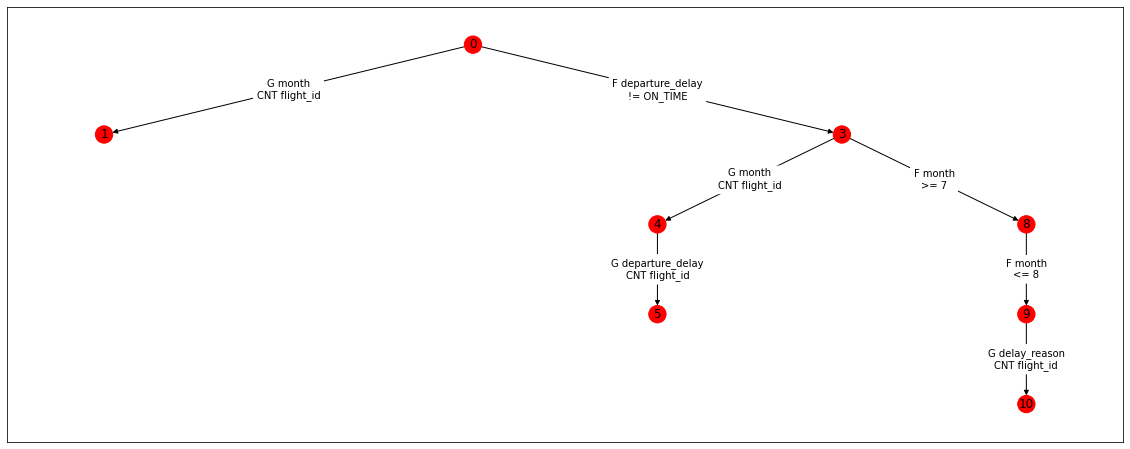

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by month CNT(flight_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,flight_id
month,
1,464
2,199
3,590
4,772
5,935
6,584
7,1443
8,1251
9,312


### Query 3: <span style="color:blue;">Filter departure_delay != ON_TIME</span>

In [6]:
display(prepare_display(action_execution_result_lst, 2))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
606,606,B6,BOS,PIT,1285,None,SMALL_DELAY,MID_FLIGHT,MORNING,MORNING,4,1,1
909,909,B6,BOS,JAX,1109,AIRLINE,LARGE_DELAY,LONG_FLIGHT,MORNING,MORNING,4,1,1
2554,2554,UA,BOS,ORD,1135,LATE_AIRCRAFT,SMALL_DELAY,MID_FLIGHT,MORNING,MORNING,4,1,1
2822,2822,B6,BOS,PBI,921,None,SMALL_DELAY,LONG_FLIGHT,MORNING,AFTERNOON,4,1,1
3049,3049,B6,BOS,FLL,2169,AIRLINE,MID_DELAY,LONG_FLIGHT,MORNING,AFTERNOON,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468720,468720,AA,BOS,MIA,1355,LATE_AIRCRAFT,SMALL_DELAY,LONG_FLIGHT,EVENING,EVENING,6,31,2
468817,468817,B6,BOS,LAX,687,None,SMALL_DELAY,LONG_FLIGHT,EVENING,EVENING,6,31,2
468905,468905,B6,BOS,PBI,321,None,SMALL_DELAY,LONG_FLIGHT,EVENING,EVENING,6,31,2
469153,469153,B6,BOS,LAS,777,LATE_AIRCRAFT,SMALL_DELAY,LONG_FLIGHT,EVENING,EVENING,6,31,2


### Query 4: <span style="color:DimGray">Filter departure_delay != ON_TIME AND</span> <span style="color:blue;">Group by month CNT(flight_id)</span>

In [7]:
display(prepare_display(action_execution_result_lst, 3))

,flight_id
month,
1,69
2,66
3,64
4,176
5,308
6,130
7,286
8,310
9,82


### Query 5: <span style="color:DimGray">Filter departure_delay != ON_TIME AND Group by month CNT(flight_id) AND</span> <span style="color:blue;">Group by departure_delay CNT(flight_id)</span>

In [8]:
display(prepare_display(action_execution_result_lst, 4))

flight_id
month departure_delay           
12    SMALL_DELAY             73
      MID_DELAY               17
      LARGE_DELAY             14
11    SMALL_DELAY             76
      MID_DELAY               43
      LARGE_DELAY             40
10    SMALL_DELAY             34
      MID_DELAY                4
      LARGE_DELAY              3
9     SMALL_DELAY             54
      MID_DELAY               16
      LARGE_DELAY             12
8     SMALL_DELAY            207
      MID_DELAY               66
      LARGE_DELAY             37
7     SMALL_DELAY            188
      MID_DELAY               57
      LARGE_DELAY             41
6     SMALL_DELAY             89
      MID_DELAY               21
      LARGE_DELAY             20
5     SMALL_DELAY            187
      MID_DELAY               78
      LARGE_DELAY             43
4     SMALL_DELAY            120
      MID_DELAY               39
      LARGE_DELAY             17
3     SMALL_DELAY             45
      MID_DELAY               13
      LARGE_DELAY              6
2     SMALL_DELAY             45
      MID_DELAY               17
      LARGE_DELAY              4
1     SMALL_DELAY             42
      MID_DELAY               19
      LARGE_DELAY              8

### Query 8: <span style="color:DimGray">Filter departure_delay != ON_TIME AND</span> <span style="color:blue;">Filter month >= 7</span>

In [9]:
display(prepare_display(action_execution_result_lst, 7))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
30921,30921,B6,BOS,BUF,515,AIRLINE,MID_DELAY,MID_FLIGHT,NIGHT,MORNING,6,3,7
31879,31879,UA,BOS,EWR,1553,AIRLINE,SMALL_DELAY,SHORT_FLIGHT,MORNING,MORNING,6,3,7
31972,31972,DL,BOS,DTW,2079,None,SMALL_DELAY,MID_FLIGHT,MORNING,MORNING,6,3,7
32240,32240,B6,BOS,HOU,1031,AIR_SYSTEM,SMALL_DELAY,LONG_FLIGHT,MORNING,MORNING,6,3,7
32881,32881,B6,BOS,MCO,51,None,SMALL_DELAY,LONG_FLIGHT,MORNING,MORNING,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440690,440690,B6,BOS,RSW,865,None,SMALL_DELAY,LONG_FLIGHT,EVENING,EVENING,4,29,8
440692,440692,B6,BOS,BWI,1427,AIRLINE,LARGE_DELAY,SHORT_FLIGHT,EVENING,EVENING,4,29,8
440852,440852,WN,BOS,BWI,382,LATE_AIRCRAFT,LARGE_DELAY,MID_FLIGHT,EVENING,EVENING,4,29,8
441099,441099,DL,BOS,LGA,2695,AIRLINE,MID_DELAY,SHORT_FLIGHT,EVENING,EVENING,4,29,8


### Query 9: <span style="color:DimGray">Filter departure_delay != ON_TIME AND Filter month >= 7 AND</span> <span style="color:blue;">Filter month <= 8</span>

In [10]:
display(prepare_display(action_execution_result_lst, 8))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
30921,30921,B6,BOS,BUF,515,AIRLINE,MID_DELAY,MID_FLIGHT,NIGHT,MORNING,6,3,7
31879,31879,UA,BOS,EWR,1553,AIRLINE,SMALL_DELAY,SHORT_FLIGHT,MORNING,MORNING,6,3,7
31972,31972,DL,BOS,DTW,2079,None,SMALL_DELAY,MID_FLIGHT,MORNING,MORNING,6,3,7
32240,32240,B6,BOS,HOU,1031,AIR_SYSTEM,SMALL_DELAY,LONG_FLIGHT,MORNING,MORNING,6,3,7
32881,32881,B6,BOS,MCO,51,None,SMALL_DELAY,LONG_FLIGHT,MORNING,MORNING,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440690,440690,B6,BOS,RSW,865,None,SMALL_DELAY,LONG_FLIGHT,EVENING,EVENING,4,29,8
440692,440692,B6,BOS,BWI,1427,AIRLINE,LARGE_DELAY,SHORT_FLIGHT,EVENING,EVENING,4,29,8
440852,440852,WN,BOS,BWI,382,LATE_AIRCRAFT,LARGE_DELAY,MID_FLIGHT,EVENING,EVENING,4,29,8
441099,441099,DL,BOS,LGA,2695,AIRLINE,MID_DELAY,SHORT_FLIGHT,EVENING,EVENING,4,29,8


### Query 10: <span style="color:DimGray">Filter departure_delay != ON_TIME AND Filter month >= 7 AND Filter month <= 8 AND</span> <span style="color:blue;">Group by delay_reason CNT(flight_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 9))

,flight_id
delay_reason,
AIRLINE,152
None,151
LATE_AIRCRAFT,146
AIR_SYSTEM,106
WEATHER,40
SECURITY,1
